# Simple parallelization in Jupyter Notebooks

The usual modules `concurrent.futures` and `multiprocessing` do not work correctly in notebooks on all platforms (notably on OSX there are issues). What does work is joblib, which also offers a simple way to run embarrassingly parallel jobs.

In [1]:
from joblib import Parallel, delayed
import numpy as np

In [2]:
# silly function that simulates numerical workload
def run(n):
    r = 0
    rng = np.random.default_rng(1)
    for itry in range(1000):
        x = rng.normal(size=n)
        r += np.sum(x)
    return r

n = np.full((4,), 100000)
y = Parallel(8)(delayed(run)(ni) for ni in n)

In [3]:
import time
import matplotlib.pyplot as plt

In [7]:
njob = np.arange(1, 9)
n = (10 ** np.arange(2, 6, 0.5)).astype(int)
data = np.empty((len(njob), len(n)))
for i, njobi in enumerate(njob):
    for j, nj in enumerate(n):
        t = time.perf_counter()
        n_per_job = nj // njobi
        Parallel(njobi)(delayed(run)(ni) for ni in np.full(njobi, n_per_job))
        t = time.perf_counter() - t
        data[i, j] = t
        print(njobi, nj, t)

1 100
1 316
1 1000
1 3162
1 10000
1 31622
1 100000
1 316227
2 100
2 316
2 1000
2 3162
2 10000
2 31622
2 100000
2 316227
3 100
3 316
3 1000
3 3162
3 10000
3 31622
3 100000
3 316227
4 100
4 316
4 1000
4 3162
4 10000
4 31622
4 100000
4 316227
5 100
5 316
5 1000
5 3162
5 10000
5 31622
5 100000
5 316227
6 100
6 316
6 1000
6 3162
6 10000
6 31622
6 100000
6 316227
7 100
7 316
7 1000
7 3162
7 10000
7 31622
7 100000
7 316227
8 100
8 316
8 1000
8 3162
8 10000
8 31622
8 100000
8 316227


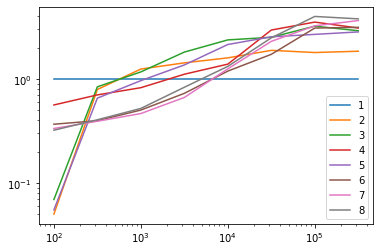

In [9]:
for i, njobi in enumerate(njob):
    plt.plot(n, data[0] / data[i], label=f"{njobi}")
plt.loglog()
plt.legend();